In [1]:
import gc
gc.collect()

In [2]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns
sns.set()
from collections import Counter
from nltk.corpus import stopwords

import keras
from sklearn.model_selection import train_test_split
import string
import os
import time
from PIL import Image
import glob
from pickle import dump, load
from time import time
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
# from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

In [3]:
#images='../input/flickr-image-dataset/flickr30k_images/flickr30k_images'
#text_file='../input/flickr-image-dataset/flickr30k_images/results.csv'

images='C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images'
text_file='C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\captions.txt'

In [4]:
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


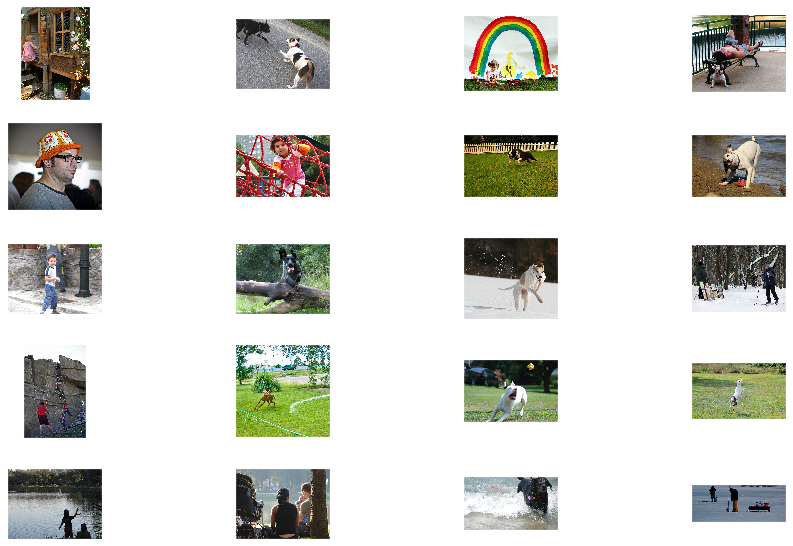

In [5]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mpimg.imread(all_imgs[i]));

In [6]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [7]:
doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


In [8]:
#/ this is for flickr30k dataset operation/
all_img_id=[]
all_img_vector=[]
annotations=[]
f=open(text_file,"r")
for line in f.readlines()[1:]:
    img_id=line.split('|',1)[0]
    cap=line.split('|')[-1]
    all_img_id.append(img_id)
    all_img_vector.append(images+'/'+img_id)
    annotations.append(cap.split('\n')[0])

    #print(img_id,cap)
limit = 100000
all_img_id = all_img_id[:limit]
all_img_vector = all_img_vector[:limit]
annotations=annotations[:limit]
df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,"1000268201_693b08cb0e.jpg,A child in a pink dr...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"1000268201_693b08cb0e.jpg,A child in a pink dr..."
1,"1000268201_693b08cb0e.jpg,A girl going into a ...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"1000268201_693b08cb0e.jpg,A girl going into a ..."
2,"1000268201_693b08cb0e.jpg,A little girl climbi...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"1000268201_693b08cb0e.jpg,A little girl climbi..."
3,"1000268201_693b08cb0e.jpg,A little girl climbi...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"1000268201_693b08cb0e.jpg,A little girl climbi..."
4,"1000268201_693b08cb0e.jpg,A little girl in a p...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"1000268201_693b08cb0e.jpg,A little girl in a p..."
...,...,...,...
40450,"997722733_0cb5439472.jpg,A man in a pink shirt...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"997722733_0cb5439472.jpg,A man in a pink shirt..."
40451,"997722733_0cb5439472.jpg,A man is rock climbin...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"997722733_0cb5439472.jpg,A man is rock climbin..."
40452,"997722733_0cb5439472.jpg,A person in a red shi...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"997722733_0cb5439472.jpg,A person in a red shi..."
40453,"997722733_0cb5439472.jpg,A rock climber in a r...",C:\Users\abhis\Ankit\Caption Project\Caption P...,"997722733_0cb5439472.jpg,A rock climber in a r..."


In [9]:
#/ this is for flickr8k dataset operation/

all_img_id=[]
all_img_vector=[]
annotations=[]
f=open(text_file,"r")
for line in f.readlines()[1:]:
    img_id, cap = line.split(',', 1)
    img_id=img_id.split('.')[0]

    all_img_id.append(img_id)
    all_img_vector.append(images+'/'+img_id+'.jpg')
    annotations.append(cap.split('\n')[0])
    
df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A girl going into a wooden building .
2,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472,C:\Users\abhis\Ankit\Caption Project\Caption P...,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472,C:\Users\abhis\Ankit\Caption Project\Caption P...,A man is rock climbing high in the air .
40452,997722733_0cb5439472,C:\Users\abhis\Ankit\Caption Project\Caption P...,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472,C:\Users\abhis\Ankit\Caption Project\Caption P...,A rock climber in a red shirt .


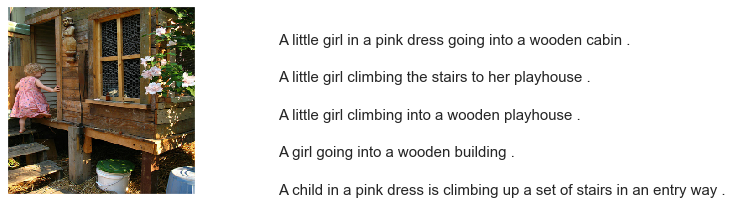

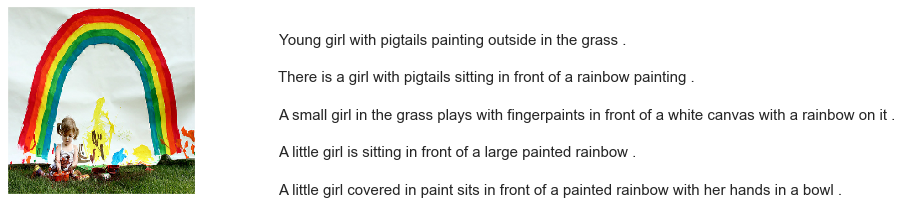

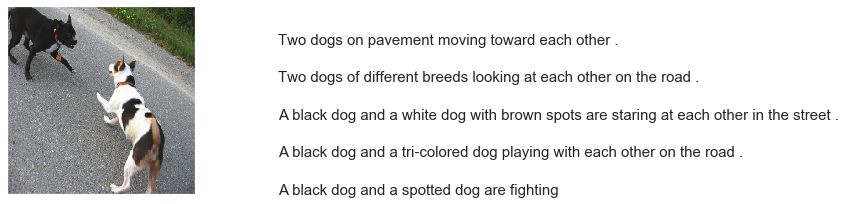

In [10]:
img_path=list(set(df.Path[:15]))
count = 1
j=0
for path in img_path:
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [224, 224])
      
    fig = plt.figure(figsize=(10,20))
    ax = fig.add_subplot(5,2,count,xticks=[],yticks=[])
    ax.imshow(img)
    

    count += 1
      
    ax = fig.add_subplot(5,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,5)
    
    img_cap=df.loc[df['Path'] == path, 'Captions']
    
    for i in range(len(img_cap)):
        ax.text(0,i,img_cap.iloc[i],fontsize=15)
    count += 1
    j+=1
plt.show()


    
    

In [11]:
annotations=[]
for cap in df.Captions:
    cap='<start> '+ cap + ' <end>'
    annotations.append(cap)
annotations

['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>',
 '<start> A black dog and a spotted dog are fighting <end>',
 '<start> A black dog and a tri-colored dog playing with each other on the road . <end>',
 '<start> A black dog and a white dog with brown spots are staring at each other in the street . <end>',
 '<start> Two dogs of different breeds looking at each other on the road . <end>',
 '<start> Two dogs on pavement moving toward each other . <end>',
 '<start> A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . <end>',
 '<start> A little girl is sitting in front of a large painted rainbow . <end>',
 '<start> A small girl in the grass plays 

In [12]:
all_img_vector=[]
for img_path in df.Path:
    all_img_vector.append(img_path)

all_img_vector

['C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1000268201_693b08cb0e.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1000268201_693b08cb0e.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1000268201_693b08cb0e.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1000268201_693b08cb0e.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1000268201_693b08cb0e.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1001773457_577c3a7d70.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1001773457_577c3a7d70.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1001773457_577c3a7d70.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1001773457_577c3a7d70.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\Images/1001773457_577c3a7d70.jpg',
 'C:\\Users\\abhis\\Ankit\\Caption Proje

In [13]:
def gen_vocabulary():
    vocab = []
    for cap in df.Captions.values:
        vocab.extend(cap.split())
    print("Size of vocabulary: {}".format(len(set(vocab))))
    return vocab

In [14]:
vocabulary=gen_vocabulary()

Size of vocabulary: 9862


In [15]:
val_count=Counter(vocabulary)
val_count

Counter({'A': 21481,
         'child': 1477,
         'in': 18961,
         'a': 40271,
         'pink': 734,
         'dress': 347,
         'is': 9345,
         'climbing': 502,
         'up': 1260,
         'set': 108,
         'of': 6712,
         'stairs': 109,
         'an': 1944,
         'entry': 1,
         'way': 50,
         '.': 34212,
         'girl': 3217,
         'going': 149,
         'into': 1074,
         'wooden': 284,
         'building': 509,
         'little': 1625,
         'playhouse': 6,
         'the': 15328,
         'to': 3173,
         'her': 1178,
         'cabin': 4,
         'black': 3696,
         'dog': 7982,
         'and': 8850,
         'spotted': 37,
         'are': 3503,
         'fighting': 132,
         'tri-colored': 14,
         'playing': 2008,
         'with': 7760,
         'each': 430,
         'other': 771,
         'on': 10729,
         'road': 388,
         'white': 3875,
         'brown': 2475,
         'spots': 29,
         'staring'

Text(0.5, 1.0, 'Top 30 occurinng words')

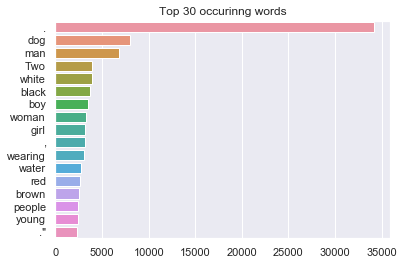

In [16]:
sort_lst = val_count.most_common(30)
stop=set(stopwords.words('english'))
x, y=[], []
for word,count in sort_lst:
    if (word.lower() not in stop):
        x.append(word)
        y.append(count)
            
sns.barplot(x=y,y=x).set_title('Top 30 occurinng words')

In [17]:
import pickle
def save_obj(obj, name ):
    with open('C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\working\\'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open('C:\\Users\\abhis\\Ankit\\Caption Project\\Caption Project\\working\\' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [18]:
save_obj(df, "dataframe")

In [19]:
df=load_obj('dataframe')
df

,ID,Path,Captions
0,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A girl going into a wooden building .
2,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e,C:\Users\abhis\Ankit\Caption Project\Caption P...,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472,C:\Users\abhis\Ankit\Caption Project\Caption P...,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472,C:\Users\abhis\Ankit\Caption Project\Caption P...,A man is rock climbing high in the air .
40452,997722733_0cb5439472,C:\Users\abhis\Ankit\Caption Project\Caption P...,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472,C:\Users\abhis\Ankit\Caption Project\Caption P...,A rock climber in a red shirt .


In [20]:
import gc
gc.collect()

37766

In [21]:
image_model = keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

base_model = keras.Model(new_input, hidden_layer)

In [22]:
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [23]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = preprocess_input(img)
    return img, image_path

In [24]:
from tqdm.notebook import tqdm

encode_train = sorted(set(all_img_vector))

feature_dict = {}


image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)


In [25]:
len(encode_train)

8091

In [26]:
from tqdm import tqdm
for img, path in tqdm(image_dataset):
    batch_features = base_model(img)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        feature_dict[path_of_feature] =  bf.numpy()

100%|████████████████████████████████████████████████████████████████████████████████| 253/253 [06:36<00:00,  1.57s/it]


In [27]:
bf.shape

TensorShape([64, 2048])

In [28]:
import gc
gc.collect()
len(feature_dict)

8091

In [29]:
top_k = 5000
tokenizer = keras.preprocessing.text.Tokenizer(num_words=top_k,oov_token="<unk>",filters='!"#$%&()*+.-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(annotations)

train_seqs = tokenizer.texts_to_sequences(annotations)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
train_seqs = tokenizer.texts_to_sequences(annotations)

In [30]:
tokenizer.word_index

{'<unk>': 1,
 'a': 2,
 '<start>': 3,
 '<end>': 4,
 'in': 5,
 'the': 6,
 'on': 7,
 'is': 8,
 'and': 9,
 'dog': 10,
 'with': 11,
 'man': 12,
 'of': 13,
 'two': 14,
 'white': 15,
 'black': 16,
 'boy': 17,
 'are': 18,
 'woman': 19,
 'girl': 20,
 ',': 21,
 'to': 22,
 'wearing': 23,
 'at': 24,
 'people': 25,
 'water': 26,
 'red': 27,
 'young': 28,
 'brown': 29,
 'an': 30,
 'his': 31,
 'blue': 32,
 'dogs': 33,
 'running': 34,
 'through': 35,
 'playing': 36,
 'while': 37,
 'shirt': 38,
 'down': 39,
 'standing': 40,
 'ball': 41,
 'little': 42,
 'grass': 43,
 'snow': 44,
 'child': 45,
 'person': 46,
 'jumping': 47,
 'over': 48,
 'three': 49,
 'front': 50,
 'sitting': 51,
 'holding': 52,
 'up': 53,
 'field': 54,
 'small': 55,
 'by': 56,
 'large': 57,
 'green': 58,
 'one': 59,
 'group': 60,
 'yellow': 61,
 'her': 62,
 'walking': 63,
 'children': 64,
 'men': 65,
 'into': 66,
 'air': 67,
 'beach': 68,
 'near': 69,
 'mouth': 70,
 'jumps': 71,
 'another': 72,
 'for': 73,
 'street': 74,
 'runs': 75,
 '

In [31]:
annotations[:5]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>']

In [32]:
train_seqs[:5]

[[3, 2, 45, 5, 2, 92, 174, 8, 121, 53, 2, 395, 13, 396, 5, 30, 1, 672, 4],
 [3, 2, 20, 318, 66, 2, 198, 119, 4],
 [3, 2, 42, 20, 121, 66, 2, 198, 2439, 4],
 [3, 2, 42, 20, 121, 6, 396, 22, 62, 2439, 4],
 [3, 2, 42, 20, 5, 2, 92, 174, 318, 66, 2, 198, 2983, 4]]

In [33]:
tokenizer.word_counts

OrderedDict([('<start>', 40455),
             ('a', 62992),
             ('child', 1545),
             ('in', 18986),
             ('pink', 739),
             ('dress', 348),
             ('is', 9345),
             ('climbing', 507),
             ('up', 1302),
             ('set', 109),
             ('of', 6723),
             ('stairs', 109),
             ('an', 2432),
             ('entry', 1),
             ('way', 53),
             ('<end>', 40455),
             ('girl', 3328),
             ('going', 149),
             ('into', 1074),
             ('wooden', 284),
             ('building', 510),
             ('little', 1768),
             ('playhouse', 6),
             ('the', 18419),
             ('to', 3176),
             ('her', 1178),
             ('cabin', 4),
             ('black', 3848),
             ('dog', 8138),
             ('and', 8862),
             ('spotted', 38),
             ('are', 3504),
             ('fighting', 133),
             ('tri', 14),
             ('color

Text(0.5, 1.0, 'Top 30 occurinng words')

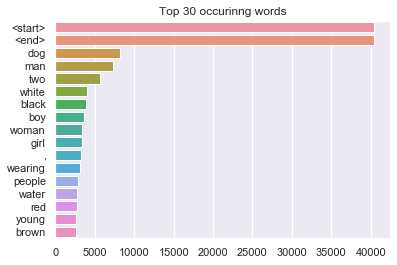

In [34]:
sorted_by_word_count = sorted(tokenizer.word_counts.items(), key=lambda kv: kv[1], reverse=True)
x, y=[], []
for word,count in sorted_by_word_count[:30]:
    if (word.lower() not in stop):
        x.append(word)
        y.append(count)
            
sns.barplot(x=y,y=x).set_title('Top 30 occurinng words')

In [35]:
def calc_max_length(tensor):
    max_t=max(len(t) for t in tensor)
    print("The maximum length of a sentence in the annotation dataset is: " + str(max_t) )
    return max_t

In [36]:
max_length = calc_max_length(train_seqs)
cap_vector = keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post', maxlen=max_length)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The maximum length of a sentence in the annotation dataset is: 40
The shape of Caption vector is :(40455, 40)


In [37]:
img_train, img_test, cap_train, cap_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

In [38]:
print("Training data for images: " + str(len(img_train)))
print("Testing data for images: " + str(len(img_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [39]:
save_obj(img_train, "img_train")
save_obj(cap_train, "cap_train")
save_obj(img_test, "img_test")
save_obj(cap_test, "cap_test")

In [40]:
def map_func(img_name, cap):
    img_tensor = feature_dict[img_name.decode('utf-8')]
    return img_tensor, cap

In [41]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
train_num_steps = len(img_train) // BATCH_SIZE
test_num_steps = len(img_test) // BATCH_SIZE
features_shape = bf.shape[1]
attention_features_shape = bf.shape[0]

In [42]:
def gen_dataset(img_data, cap_data):
    
    dataset = tf.data.Dataset.from_tensor_slices((img_data, cap_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [43]:
train_dataset=gen_dataset(img_train,cap_train)
test_dataset=gen_dataset(img_test,cap_test)

In [44]:
dataset = train_dataset.take(1)
for img,cap in dataset:
    print(img.shape)
    print(cap.shape)

(32, 64, 2048)
(32, 40)


In [45]:
class CNN_Encoder(keras.Model):

    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        self.fc = layers.Dense(embedding_dim)
        self.dropout = layers.Dropout(0.5)
        
    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

encoder = CNN_Encoder(embedding_dim)



In [46]:
class Attention_model(keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = layers.Dense(units)
        self.W2 = layers.Dense(units)
        self.V = layers.Dense(1)

    def call(self,features,hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # score shape == (batch_size, 64, hidden_size)
        score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

    # attention_weights shape == (batch_size, 64, 1)
    # you get 1 at the last axis because you are applying score to self.V
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [47]:
class RNN_Decoder(Model):
    def __init__(self, embedding_dim, units, vocab_size):

        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = layers.Embedding(vocab_size, embedding_dim)
        self.gru = layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
        
        self.fc1 = layers.Dense(self.units)
        self.fc2 = layers.Dense(vocab_size)

        self.attention = Attention_model(self.units)

    def call(self, x, features, hidden):
    # defining attention as a separate model
        context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
        output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
        x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
        x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
        x = self.fc2(x)

        return x, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [48]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = layers.Dense(units)
        self.W2 = layers.Dense(units)
        self.V = layers.Dense(1)
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 64, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1) # shape: (batch_size, 1, hidden_size)
        score = keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) #shape: (batch_size, 64, units)
        attention_weights = keras.activations.softmax(self.V(score), axis=1) #shape: (batch_size, 64, 1)
        context_vector = attention_weights * features #shape: (batch_size, 64,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)#shape: (batch_size, embedding_dim)
        

        return context_vector, attention_weights
    

In [49]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)
        self.embed = layers.Embedding(vocab_size, embed_dim,mask_zero=True)
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = layers.Dense(self.units)
        self.d2 = layers.Dense(vocab_size)
        self.dropout = Dropout(0.5)
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)
        embed = self.dropout(self.embed(x)) #shape: (batch_size, 1, embedding_dim)
        mask = self.embed.compute_mask(x)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) #shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed,mask=mask) # output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))
    
decoder=Decoder(embedding_dim, units, vocab_size)

In [50]:
attention=Attention_model(units)

In [51]:
decoder = RNN_Decoder(embedding_dim, units, vocab_size)
attention=Attention_model(units)

In [52]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape) 
print(sample_cap_batch.shape)

(32, 64, 2048)
(32, 40)


In [53]:
features=encoder(sample_img_batch)
features.shape

TensorShape([32, 64, 256])

In [54]:
features=encoder(sample_img_batch)

hidden = decoder.reset_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)
print(hidden.shape)
print(dec_input.shape)

(32, 512)
(32, 1)


In [55]:
dummy_dataset = train_dataset.take(1)
for img,cap in dummy_dataset:
    features=encoder(img)
    hidden = decoder.reset_state(batch_size=cap.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * cap.shape[0], 1)
    context_vector, attention_weights=attention(features, hidden)
    predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
    print(features.shape)
    print(predictions.shape)
    print(attention_weights.shape)
    print(context_vector.shape)

(32, 64, 256)
(32, 5001)
(32, 64, 1)
(32, 256)


In [56]:
loss_object = keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
optimizer = keras.optimizers.Adam()

In [57]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [59]:
# os.makedirs('../output/kaggle/working/checkpoints/train')

In [60]:
checkpoint_path = "..working/checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [61]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [62]:
# @tf.function
# def train_step(img_tensor, target):
#   loss = 0
#   hidden = decoder.reset_state(batch_size=target.shape[0])
#   dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

#   with tf.GradientTape() as tape:
#       features = encoder(img_tensor)

#       for i in range(1, target.shape[1]):
#           predictions, hidden, _ = decoder(dec_input, features, hidden)
#           loss += loss_function(target[:, i], predictions)
#           dec_input = tf.expand_dims(target[:, i], 1)
        
#   avg_loss = (loss / int(target.shape[1]))

#   trainable_variables = encoder.trainable_variables + decoder.trainable_variables
#   gradients = tape.gradient(loss, trainable_variables)
#   optimizer.apply_gradients(zip(gradients, trainable_variables))

#   return loss, avg_loss

In [63]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.reset_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        
    avg_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, avg_loss

In [64]:
# @tf.function
# def train_step(img_tensor, target):
#   loss = 0
#   hidden = decoder.reset_state(batch_size=target.shape[0])
#   dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

#   with tf.GradientTape() as tape:
#       features = encoder(img_tensor)

#       for i in range(1, target.shape[1]):
#           predictions, hidden, _ = decoder(dec_input, features, hidden)
#           loss += loss_function(target[:, i], predictions)
#           dec_input = tf.expand_dims(target[:, i], 1)
        
#   avg_loss = (loss / int(target.shape[1]))

#   trainable_variables = encoder.trainable_variables + decoder.trainable_variables
#   gradients = tape.gradient(loss, trainable_variables)
#   optimizer.apply_gradients(zip(gradients, trainable_variables))

#   return loss, avg_loss

In [71]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.reset_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        
    avg_loss = (loss / int(target.shape[1]))
    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    return loss, avg_loss

In [72]:
# def test_loss_cal(test_dataset):
    
#   total_loss = 0
#   for (batch, (img_tensor, target)) in enumerate(test_dataset):
#     batch_loss, t_loss = test_step(img_tensor, target)
    
#     total_loss += t_loss
#     avg_test_loss=total_loss/test_num_steps
#   return avg_test_loss

In [73]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        avg_test_loss=total_loss/test_num_steps
    return avg_test_loss

In [68]:
loss_plot = []
test_loss_plot = []
gc.collect()

297

In [69]:
import time

In [74]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]


For epoch: 1, the train loss is 0.938, & test loss is 0.927
Time taken for 1 epoch 1211.118691444397 sec

Test loss has been reduced from 100.000 to 0.927


  7%|█████▎                                                                         | 1/15 [20:11<4:42:38, 1211.32s/it]

For epoch: 2, the train loss is 0.847, & test loss is 0.838
Time taken for 1 epoch 1129.094559431076 sec

Test loss has been reduced from 0.927 to 0.838



 13%|██████████▌                                                                    | 2/15 [39:00<4:17:07, 1186.71s/it]

For epoch: 3, the train loss is 0.784, & test loss is 0.778
Time taken for 1 epoch 1108.2963564395905 sec

Test loss has been reduced from 0.838 to 0.778



 27%|████████████████████▌                                                        | 4/15 [1:16:30<3:32:04, 1156.79s/it]

For epoch: 4, the train loss is 0.734, & test loss is 0.727
Time taken for 1 epoch 1141.5658993721008 sec

Test loss has been reduced from 0.778 to 0.727



 33%|█████████████████████████▋                                                   | 5/15 [1:34:50<3:09:56, 1139.68s/it]

For epoch: 5, the train loss is 0.690, & test loss is 0.684
Time taken for 1 epoch 1099.5910308361053 sec

Test loss has been reduced from 0.727 to 0.684
For epoch: 6, the train loss is 0.650, & test loss is 0.644
Time taken for 1 epoch 1096.191325187683 sec

Test loss has been reduced from 0.684 to 0.644



 40%|██████████████████████████████▊                                              | 6/15 [1:53:06<2:49:00, 1126.69s/it]

For epoch: 7, the train loss is 0.614, & test loss is 0.608
Time taken for 1 epoch 1097.1916196346283 sec

Test loss has been reduced from 0.644 to 0.608



 53%|█████████████████████████████████████████                                    | 8/15 [2:29:42<2:09:44, 1112.03s/it]

For epoch: 8, the train loss is 0.581, & test loss is 0.575
Time taken for 1 epoch 1098.1315376758575 sec

Test loss has been reduced from 0.608 to 0.575



 60%|██████████████████████████████████████████████▏                              | 9/15 [2:48:02<1:50:50, 1108.47s/it]

For epoch: 9, the train loss is 0.550, & test loss is 0.546
Time taken for 1 epoch 1100.0146610736847 sec

Test loss has been reduced from 0.575 to 0.546


For epoch: 10, the train loss is 0.523, & test loss is 0.518
Time taken for 1 epoch 1099.138549566269 sec

Test loss has been reduced from 0.546 to 0.518


 73%|███████████████████████████████████████████████████████▋                    | 11/15 [3:24:39<1:13:33, 1103.29s/it]

For epoch: 11, the train loss is 0.497, & test loss is 0.492
Time taken for 1 epoch 1097.420978307724 sec

Test loss has been reduced from 0.518 to 0.492



 80%|██████████████████████████████████████████████████████████████▍               | 12/15 [3:42:58<55:05, 1101.84s/it]

For epoch: 12, the train loss is 0.474, & test loss is 0.469
Time taken for 1 epoch 1098.2995285987854 sec

Test loss has been reduced from 0.492 to 0.469


For epoch: 13, the train loss is 0.452, & test loss is 0.448
Time taken for 1 epoch 1099.4819684028625 sec

Test loss has been reduced from 0.469 to 0.448


 93%|████████████████████████████████████████████████████████████████████████▊     | 14/15 [4:19:35<18:20, 1100.10s/it]

For epoch: 14, the train loss is 0.433, & test loss is 0.430
Time taken for 1 epoch 1097.3864874839783 sec

Test loss has been reduced from 0.448 to 0.430



100%|██████████████████████████████████████████████████████████████████████████████| 15/15 [4:37:54<00:00, 1111.60s/it]

For epoch: 15, the train loss is 0.418, & test loss is 0.414
Time taken for 1 epoch 1098.3907368183136 sec

Test loss has been reduced from 0.430 to 0.414


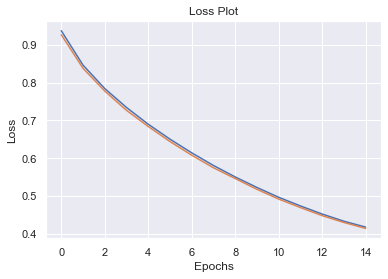

In [75]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [76]:
os.listdir("..working/checkpoints/train")

['checkpoint',
 'ckpt-11.data-00000-of-00001',
 'ckpt-11.index',
 'ckpt-12.data-00000-of-00001',
 'ckpt-12.index',
 'ckpt-13.data-00000-of-00001',
 'ckpt-13.index',
 'ckpt-14.data-00000-of-00001',
 'ckpt-14.index',
 'ckpt-15.data-00000-of-00001',
 'ckpt-15.index']

In [77]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = base_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [78]:
def beam_evaluate(image, beam_index = 3):
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = base_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption



In [79]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [86]:
# checkpoint_path = "..working/checkpoints/train/ckpt-5"
   
# ckpt = tf.train.Checkpoint(encoder=encoder,decoder=decoder,optimizer = optimizer)
# ckpt.restore(checkpoint_path)

In [81]:
from nltk.translate.bleu_score import sentence_bleu

In [82]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

BELU score: 88.64052604279183
Real Caption: a little girl in a red snowsuit sits on a snowball in a backyard
Prediction Caption: a little girl wearing a red snowsuit sits on a snowball in a backyard


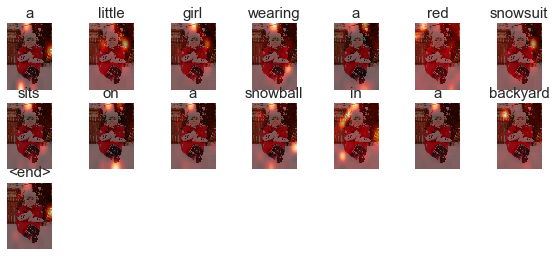

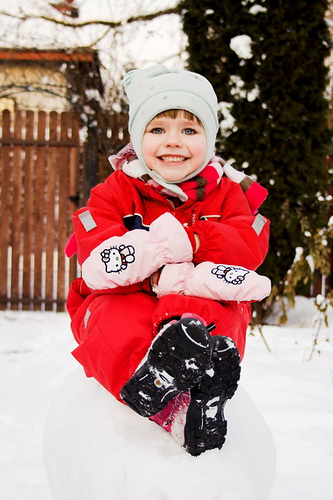

In [83]:
rid = np.random.randint(0, len(img_test))
test_image = img_test[rid]
#test_image = './dataset/Flickr8k/Flicker8k_Dataset/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [84]:
captions=beam_evaluate(test_image)
print(captions)

little little girl is a little girl is a little girl is a little girl is a little girl is a little girl is a little girl is a little girl is a little girl is a little girl
